In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import pickle

In [8]:
!pip3 install opencv-python

In [9]:
import cv2

In [17]:
DIRECTORY = r'C:\Users\akash\Practices\archive\dogscats\dogscats\train'
CATEGORIES = ['cats', 'dogs']

In [19]:
IMG_SIZE = 100

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [20]:
len(data)

23000

In [21]:
random.shuffle(data)

In [23]:
data[0]

[array([[[ 56,  45,  41],
         [ 69,  60,  52],
         [ 84,  75,  66],
         ...,
         [ 77,  90, 105],
         [ 14,  12,  21],
         [ 12,   7,  17]],
 
        [[ 61,  50,  46],
         [ 61,  52,  44],
         [ 61,  52,  42],
         ...,
         [ 57,  69,  85],
         [ 12,  11,  21],
         [ 10,   9,  20]],
 
        [[ 56,  45,  41],
         [ 62,  52,  44],
         [ 62,  53,  43],
         ...,
         [ 43,  55,  73],
         [ 10,  11,  23],
         [  8,  12,  23]],
 
        ...,
 
        [[169, 174, 165],
         [175, 180, 171],
         [167, 172, 163],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],
 
        [[174, 179, 170],
         [168, 173, 164],
         [175, 180, 171],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],
 
        [[160, 165, 156],
         [163, 168, 159],
         [178, 183, 174],
         ...,
         [251, 251, 251],
  

In [25]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [28]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [30]:
X = X/255

In [31]:
X.shape

(23000, 100, 100, 3)

In [37]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [41]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [43]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
647/647 [==============================] - 2492s 4s/step - loss: 0.6256 - accuracy: 0.6526 - val_loss: 0.5504 - val_accuracy: 0.7126
Epoch 2/5
647/647 [==============================] - 2976s 5s/step - loss: 0.5088 - accuracy: 0.7488 - val_loss: 0.4915 - val_accuracy: 0.7587
Epoch 3/5
647/647 [==============================] - 2254s 3s/step - loss: 0.4295 - accuracy: 0.7979 - val_loss: 0.4674 - val_accuracy: 0.7757
Epoch 4/5
647/647 [==============================] - 763s 1s/step - loss: 0.3302 - accuracy: 0.8581 - val_loss: 0.4974 - val_accuracy: 0.7843
Epoch 5/5
647/647 [==============================] - 747s 1s/step - loss: 0.1966 - accuracy: 0.9221 - val_loss: 0.6366 - val_accuracy: 0.7691


In [55]:
test_img = cv2.imread(r'C:\Users\akash\Practices\archive\dogscats\dogscats\train\cats\cat.57.jpg')

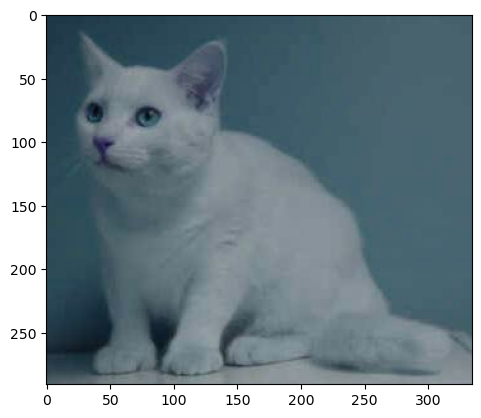

In [56]:
plt.imshow(test_img)

In [57]:
test_img.shape

(291, 335, 3)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [61]:
test_input = test_img.reshape((1,256,256,3))